<a href="https://colab.research.google.com/github/Altaieb-Mohammed/lab_2corse/blob/master/c_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

url = "https://raw.githubusercontent.com/Altaieb-Mohammed/lab_2corse/master/cleaned_inheritance_dataset.csv"

df = pd.read_csv(url)

# Уберем целевой признак (husband) — кластеризация без целевой переменной
features = ['estate', 'debts', 'wills', 'wives', 'father', 'mother',
            'sons', 'daughters', 'brothers_m', 'sisters_m', 'grandfather', 'grandmother']

# Преобразуем булевы признаки в int
for col in ['father', 'mother', 'grandfather', 'grandmother']:
    df[col] = df[col].astype(int)

X = df[features]

# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


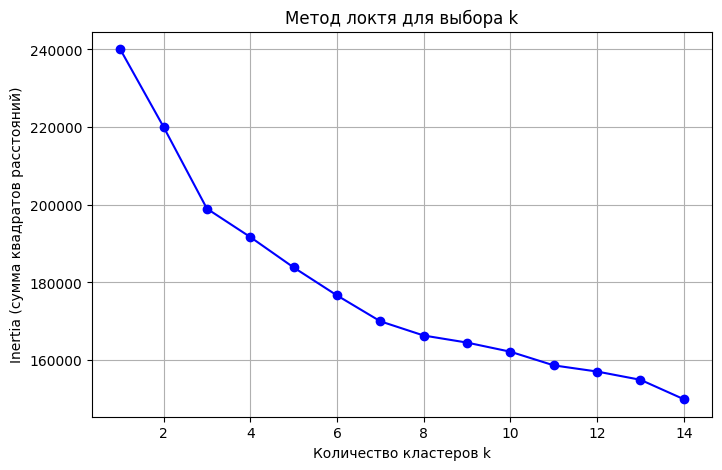

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Метод локтя для выбора оптимального числа кластеров
inertia = []
K_range = range(1, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Количество кластеров k')
plt.ylabel('Inertia (сумма квадратов расстояний)')
plt.title('Метод локтя для выбора k')
plt.grid(True)
plt.show()


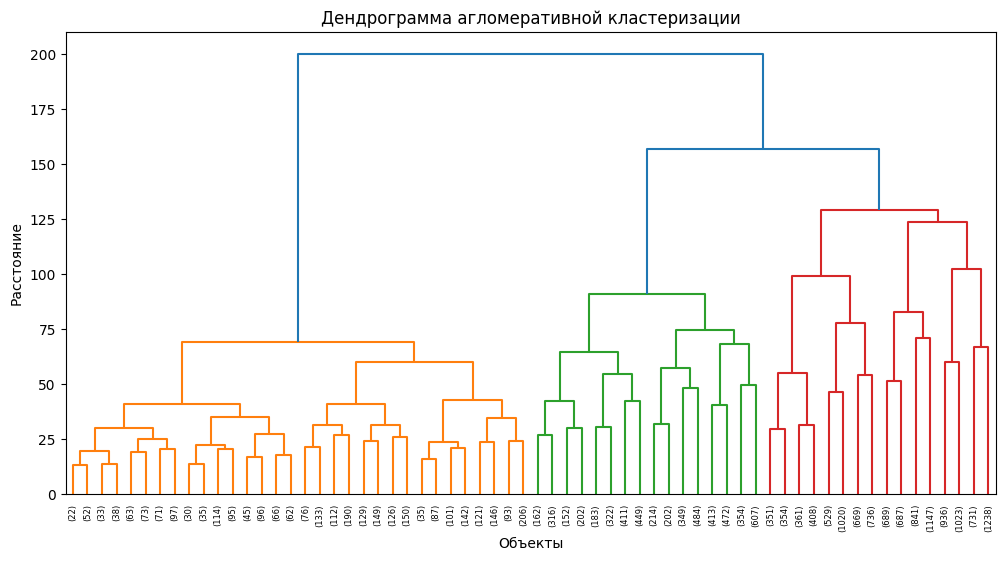

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# Построение дендрограммы с использованием метода Ward
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Дендрограмма агломеративной кластеризации')
plt.xlabel('Объекты')
plt.ylabel('Расстояние')
plt.show()


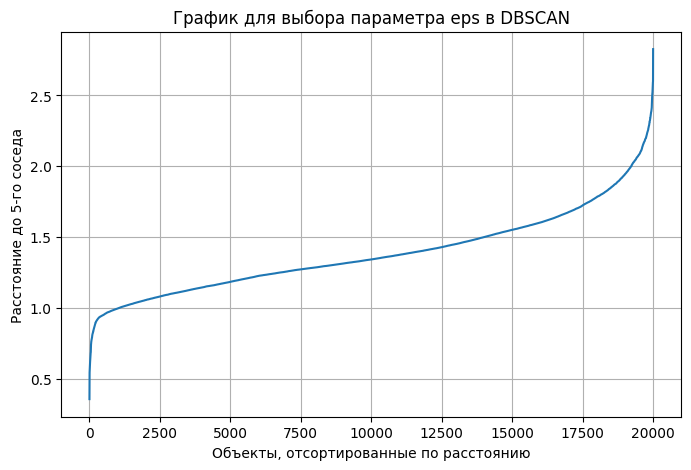

In [4]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Подбор параметра eps с помощью графика расстояний до k-го соседа
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:,4], axis=0)

plt.figure(figsize=(8,5))
plt.plot(distances)
plt.xlabel('Объекты, отсортированные по расстоянию')
plt.ylabel('Расстояние до 5-го соседа')
plt.title('График для выбора параметра eps в DBSCAN')
plt.grid(True)
plt.show()

# Пример кластеризации с выбранными параметрами (подберите eps по графику)
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# K-Means с оптимальным k (например, k=4 по локтю)
k_opt = 4
kmeans = KMeans(n_clusters=k_opt, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

print("Оценка качества K-Means:")
print("Silhouette Score:", silhouette_score(X_scaled, kmeans_labels))
print("Calinski-Harabasz Index:", calinski_harabasz_score(X_scaled, kmeans_labels))
print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, kmeans_labels))

print("\nОценка качества DBSCAN:")
# Проверяем, что DBSCAN не отнес все объекты к шуму (-1)
if len(set(dbscan_labels)) > 1:
    print("Silhouette Score:", silhouette_score(X_scaled, dbscan_labels))
    print("Calinski-Harabasz Index:", calinski_harabasz_score(X_scaled, dbscan_labels))
    print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, dbscan_labels))
else:
    print("DBSCAN выделил только один кластер или все объекты — шум.")


Оценка качества K-Means:
Silhouette Score: 0.07306717719725302
Calinski-Harabasz Index: 1682.139236509346
Davies-Bouldin Index: 2.8274812630366903

Оценка качества DBSCAN:
Silhouette Score: -0.386744143918202
Calinski-Harabasz Index: 4.636836053769054
Davies-Bouldin Index: 1.2471898256107306


In [6]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_labels, palette='tab10', legend='full')
plt.title('Кластеры K-Means на 2D проекции PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=dbscan_labels, palette='tab10', legend='full')
plt.title('Кластеры DBSCAN на 2D проекции PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


NameError: name 'kmeans_labels' is not defined

<Figure size 1000x600 with 0 Axes>

- Метод локтя помог определить оптимальное число кластеров для K-Means.
- Агломеративная кластеризация и дендрограмма показали структуру слияний.
- DBSCAN выделил кластеры с учётом плотности, эффективно обнаруживая выбросы.
- Метрики качества показывают, что K-Means и DBSCAN имеют свои преимущества в зависимости от структуры данных.
- Визуализация PCA помогает понять распределение кластеров в пространстве.
- Для улучшения результатов можно экспериментировать с параметрами DBSCAN и методами нормализации.


Краткие ответы на вопросы

    Алгоритмы на основе плотности: DBSCAN, OPTICS, Mean Shift.

    Этапы кластерного анализа: подготовка данных, выбор алгоритма, кластеризация, оценка качества, интерпретация.

    Центроид в K-Means: центр масс кластера, вычисляется как среднее координат точек кластера.

    Плотность в DBSCAN: количество точек в радиусе ε вокруг точки.

    Алгоритмы для данных с выбросами и неплоской геометрией: DBSCAN, агломеративная кластеризация с подходящими метриками.

    Виды связи для иерархической кластеризации: одиночная, полная, средняя, Ward.

    Оценка производительности: метрики силуэта, Calinski-Harabasz, Davies-Bouldin.

    Недостатки коэффициента силуэта: чувствительность к форме кластеров, не всегда отражает сложные структуры.

    Силуэтный коэффициент: мера качества кластеризации, показывает насколько объект похож на свой кластер по сравнению с другими.

    Методы выбора числа кластеров: метод локтя, силуэтный анализ, gap statistic.

    Дендрограмма: граф визуализации иерархии кластеров, показывает слияния и расстояния.

    Масштабирование: важно для корректного расчёта расстояний, чтобы признаки были сопоставимы.

    Разница агломеративной и дивизивной: агломеративная — снизу вверх, дивизивная — сверху вниз.

    Алгоритм DBSCAN: кластеризация по плотности, выделяет кластеры и шум, не требует заранее заданного числа кластеров.

    Параметры DBSCAN: eps — радиус соседства, min_samples — минимальное число соседей. Подбираются экспериментально.

    Преимущество DBSCAN: устойчивость к выбросам, выявление кластеров сложной формы.
